KeyError
Int64Index([20], dtype='int64')
Int64Index([71, 72], dtype='int64')


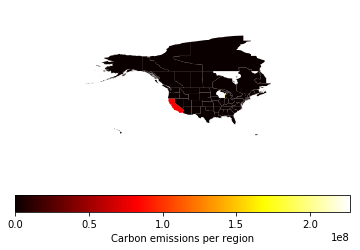

In [51]:
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

map = gp.read_file(r'C:\Users\Admin\Documents\GitHub\umass\api\map\USA_Canada_ShapefileMerge.shp')

regions = ["DE", "FR", "GB"]
trans = {"FR" : "California", "GB" : "Wisconsin"}
power_spent = np.array([1,1,1])
carbon_avgs = np.array([2,3,5])

carbon_spent = np.multiply(power_spent, carbon_avgs) 

#map.plot(cmap=)
map["carbon_emissions"] = 0
#map = map.assign(carbon_emissions=5)

df_saved = pd.read_csv(r"C:\Users\Admin\Documents\GitHub\umass\saved\2022-08-05_19-31-41_latency_latency_100_max_servers_15_timesteps_48.csv")

for region in regions: 
    carbon_int = df_saved[f"{region}_carbon_intensity"]
    requests_at_region = df_saved[f"{region}_requests_to"]
    emissions = carbon_int.multiply(requests_at_region, axis=0)
    try: 
        region_idx = map.index[map["StateName"] == trans[region]]
        print(region_idx)
        map.loc[region_idx, "carbon_emissions"] = emissions
    except: 
        print("KeyError")


fig, ax = plt.subplots(1,1)
ax.set_xlim(-180, -50)
ax.set_ylim(0, 100)

#ax.set_axis_off();

map.plot(
    column = "carbon_emissions", 
    cmap="hot", ax = ax, 
    legend=True,
    legend_kwds={'label': "Carbon emissions per region", 'orientation': "horizontal"})

# https://geopandas.org/en/stable/docs/user_guide/mapping.html

## VORE BRA OM ELECTRICITY MAP VAR PÅ SAMMA FORMAT SOM REQUESTS

## FYLLA HÅL I LATENCY 

# gdf.plot()